# Introduction

For this project, the Hand_Written digit will be predicted. There are two datasets that will be needed to implement the project:

* Training dataset for which the DeepLearning model will be trained.  
* Testing dataset where the digit is predicted.


For this project we need to import necessary modules. As seen below we can get the training and testing datasets from mnist module.
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. 

Four files are available:
- train-images-idx3-ubyte.gz: training set images (9912422 bytes)  
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes)  
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)  
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)
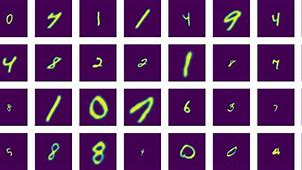

In [3]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import *
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from keras import backend as K
import matplotlib.pyplot as plt

### Loading mnist data.  

* There are a total of 60,000 images for training and 10,000 images for testing. The size of each image is "28*28"

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# print the number of images for training and tetsing
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

# print the shapes of images and their lables
print("shape of training data :",x_train.shape,y_train.shape)
print("shape of testing data :",x_test.shape,y_test.shape)

60000 60000
10000 10000
shape of training data : (60000, 28, 28) (60000,)
shape of testing data : (10000, 28, 28) (10000,)


In [5]:
# size of single image

x_train[0].shape

(28, 28)

In [6]:
# Resizing the size of images

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [7]:
print(f"Training set shape (Numerical features): {x_train.shape}")
print(f"Test set shape (Numerical features): {x_test.shape}")

Training set shape (Numerical features): (60000, 28, 28, 1)
Test set shape (Numerical features): (10000, 28, 28, 1)


- Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [8]:
print("Before to_categorical method ",y_test[0])

y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

print("After to_categorical method ",y_test[0])

Before to_categorical method  7
After to_categorical method  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
# Normalizing data

x_train=x_train/255
x_test=x_test/255

x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

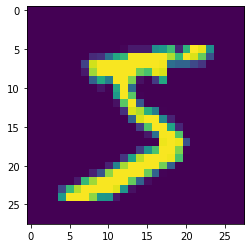

In [10]:
# plottting the image

plt.imshow(x_train[0])

### Defining DeepLearning model

#### Types of Layers used in this model 


- Keras conv2D which stands for convolution layer in a 2-dimensional pattern is responsible for generating the kernel of convolution which is then amalgamated with the other input layers of the Keras model so that the final resultant output will contain a tensor. 

- MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers.

- Flatten is used to flatten the dimensions of the image obtained after convolving it.

- Dense is used to make this a fully connected model and is the hidden layer.


#### Activation functions

- Relu activation
ReLu Layer in Keras is used for applying the rectified linear unit activation function. ReLu activation function is computationally efficient hence it enables neural networks to converge faster during the training phase.  

- Softmax Activation
The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.  


In [11]:
# Here the model is built and run for 10 epochs

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


# model.compile is related to training your model. Actually, your weights need to optimize and this function can optimize them. In a way that your accuracy make increases. This was just one of the input parameters called 'optimizer'.

model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# model was ready to run with 10 epochs
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 45s 22ms/step - loss: 0.1444 - accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0178 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 48s 26m

### Summary

model.summary() to print a useful summary of the model, which includes:

* Name and type of all layers in the model.
* Output shape for each layer.
* Number of weight parameters of each layer.
* If the model has general topology (discussed below), the inputs each layer receives
* The total number of trainable and non-trainable parameters of the model.  

For the model we defined above, we get the following output on the console:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5

### Evaluation

In [24]:
# check whether the model is best fit for the given problem and corresponding data. Keras model provides a function, evaluate which does the evaluation of the model.
# It gives accuracy and loss values. As seen below the accuracy was 0.9895 which means it predict digit with 98.9% accuracy

model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0463 - accuracy: 0.9895


[0.046302612870931625, 0.9894999861717224]

### Prediction

In [33]:
predict=model.predict([x_test])

In [49]:
# let's predict what is the digit in 16 place in x_test dataset
# our model predicted that it was 5

np.argmax(predict[15])

5

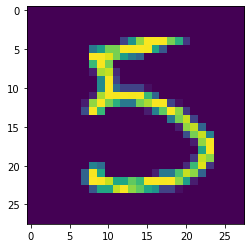

In [50]:
# let's verify that our model predicts right or wrong

plt.imshow(x_test[15])

##### Saving the model

In [15]:
model.save("hand_digit.h5")

### Loading the Saved model into NoteBook

In [51]:
# load_model() method helps us to load the saved model into the notebook
import keras
model=keras.models.load_model('hand_digit.h5')

### Testing our model with digit drawn manually

In [170]:
import win32gui     # Detect a window and move window to certain monitor

import tkinter as tk  # python interface for GUI toolkit

from PIL import ImageGrab,Image  # adds image processing capabilities

In [189]:
def draw_lines(event):
    x=event.x
    y=event.y
    canvas.create_oval(x-3,y-3,x+3,y+3,fill="black")

# recognizes the digit drawn on the window

def recognize():
    info=canvas.winfo_id()  
    rect=win32gui.GetWindowRect(info)  # gets the information about window
    image=ImageGrab.grab(bbox=(0,0,500,500)) # grab the window with in specified range
    print(image)
    predict(image)
    
# predicts the digit
    
def predict(im):
    im=im.resize((28,28))  # resizing the image because our trained model has size "28x28"
    plt.imshow(im)
    im=im.convert('L')     # convert RGB to GrayScale
    im=np.array(im)
    im=im.reshape(1,28,28,1)
    im=im/255
    res= model.predict([im])[0]
    print("predicted digit as : ",np.argmax(res))
    
# clears the entire screen   

def clear():
    canvas.delete("all")

<PIL.Image.Image image mode=RGB size=500x500 at 0x1D4FE6DF550>
predicted digit as :  7


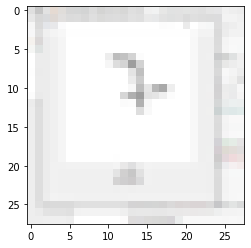

In [190]:
# Building GUI with required functonalities

root=tk.Tk()
root.geometry("400x400")

canvas=tk.Canvas(root,width=300,height=300,bg="white",cursor="cross")
clear=tk.Button(root,text="clear",command=clear)
recognize=tk.Button(root,text="Recognize",command=recognize)

canvas.pack()
clear.pack()
recognize.pack()

canvas.bind("<B1-Motion>",draw_lines)

root.mainloop()